Usage example of MediaPipe Face Detection Solution API in Python (see also http://solutions.mediapipe.dev/face_detection).

Upload any image that contains face(s) to the Colab. We take two example images from the web: https://unsplash.com/photos/JyVcAIUAcPM and https://unsplash.com/photos/auTAb39ImXg

In [2]:
import os
import cv2
import plotly.express as px
import matplotlib.pyplot as plt
import mediapipe as mp
import pandas as pd
import numpy as np

# Estrazione features di Mediapipe su tutti video del dataset

In [16]:
mp_drawing = mp.solutions.drawing_utils
mp_face_mesh = mp.solutions.face_mesh
drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)

baseDir = '/home/filippo/elderReact/dataset/ElderReact_Data/ElderReact_train/'
video = '50_50_81.mp4'

landmark_id=[i for i in range(468)] # number of landmarks

cap = cv2.VideoCapture(baseDir + video)
frames = [frame for frame in range(int(cap.get(cv2.CAP_PROP_FRAME_COUNT)))]
with mp_face_mesh.FaceMesh(
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5) as face_mesh:
    while cap.isOpened():
        success, image = cap.read()
        if not success: break

        # Convert the BGR image to RGB.
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        # To improve performance, optionally mark the image as not writeable to
        # pass by reference.
        image.flags.writeable = False
        results = face_mesh.process(image)
        # Draw the face mesh annotations on the image.
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        if results.multi_face_landmarks:
            for face_landmarks in results.multi_face_landmarks:
                mp_drawing.draw_landmarks(
                    image=image,
                    landmark_list=face_landmarks,
                    connections=mp_face_mesh.FACE_CONNECTIONS,
                    landmark_drawing_spec=drawing_spec,
                    connection_drawing_spec=drawing_spec
                    )
            landmark_x=[int(landmark.x*image.shape[1]) for landmark in face_landmarks.landmark]
            landmark_y=[int(landmark.y*image.shape[0]) for landmark in face_landmarks.landmark]


        landmarks_df = pd.DataFrame({'id':landmark_id, 'x':landmark_x, 'y':landmark_y})

        #cv2.imshow('MediaPipe FaceMesh', image)
        #if cv2.waitKey(15) & 0xFF == 27: break
cap.release()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95]


All MediaPipe Solutions Python API examples are under mp.solutions.

For the MediaPipe Face Mesh solution, we can access this module as mp_face_detection = mp.solutions.face_detection.

You may change the parameter min_detection_confidence during the initialization. Run help(mp_face_detection.FaceDetection) to get more informations about the parameter.

In [ ]:
help(mp_face_mesh.FaceMesh)

Help on class FaceMesh in module mediapipe.python.solutions.face_mesh:

class FaceMesh(mediapipe.python.solution_base.SolutionBase)
 |  FaceMesh(static_image_mode=False, max_num_faces=1, min_detection_confidence=0.5, min_tracking_confidence=0.5)
 |  
 |  MediaPipe FaceMesh.
 |  
 |  MediaPipe FaceMesh processes an RGB image and returns the face landmarks on
 |  each detected face.
 |  
 |  Please refer to https://solutions.mediapipe.dev/face_mesh#python-solution-api
 |  for usage examples.
 |  
 |  Method resolution order:
 |      FaceMesh
 |      mediapipe.python.solution_base.SolutionBase
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, static_image_mode=False, max_num_faces=1, min_detection_confidence=0.5, min_tracking_confidence=0.5)
 |      Initializes a MediaPipe FaceMesh object.
 |      
 |      Args:
 |        static_image_mode: Whether to treat the input images as a batch of static
 |          and possibly unrelated images, or a video stream. See 

# Estrazione landmark su 'frontal_face.png'

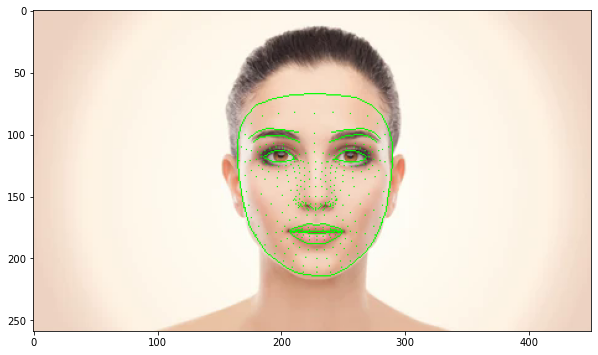

In [8]:
mp_drawing = mp.solutions.drawing_utils
mp_face_mesh = mp.solutions.face_mesh

# For static images:
drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=0)
with mp_face_mesh.FaceMesh(
  static_image_mode=True,
  max_num_faces=1,
  min_detection_confidence=0.5) as face_mesh:

  image = cv2.imread('frontal_face.png')
  # Convert the BGR image to RGB before processing.
  results = face_mesh.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

  # Print and draw face mesh landmarks on the image.
  if not results.multi_face_landmarks: print('Error')
  annotated_image = image.copy()
  for face_landmarks in results.multi_face_landmarks:
    # print('face_landmarks:', face_landmarks)
    mp_drawing.draw_landmarks(
        image=annotated_image,
        landmark_list=face_landmarks,
        connections=mp_face_mesh.FACE_CONNECTIONS,
        landmark_drawing_spec=drawing_spec,
        connection_drawing_spec=drawing_spec)
  annotated_image = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)
  plt.figure(figsize=(10,10))
  plt.imshow(annotated_image)
  plt.show()

In [29]:
for landmarks in results.multi_face_landmarks:
  id=[i for i in range(468)]
  x=[landmark.x for landmark in face_landmarks.landmark]
  y=[landmark.y for landmark in face_landmarks.landmark]

x = [int(i*451) for i in x]
y = [int(i*259) for i in y]

points = [(i,x,y) for i,x,y in zip(id,x,y)]
points

import pandas as pd

points_df = pd.DataFrame(data={'id':id, 'x':x, 'y':y})
points_df.head()

,id,x,y
0,0,127,89
1,1,130,83
2,2,128,84
3,3,128,75
4,4,131,80


Funzione per estrare un landmark date le sue coordinate

In [15]:
def extract_landmark(x, y):
  print([point for point in points if x == point[1] and y == point[2]])

extract_landmark(228,165)

[(164, 228, 165)]


In [20]:
image.shape[0]

259